In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data.csv')
print(df.head(5))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [2]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
for i in df.columns:
    print(f"unique {i}'s count: {df[i].nunique()}")
    print(f"{df[i].unique()}")



unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
unique gender's count: 2
['Female' 'Male']
unique SeniorCitizen's count: 2
[0 1]
unique Partner's count: 2
['Yes' 'No']
unique Dependents's count: 2
['No' 'Yes']
unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
unique PhoneService's count: 2
['No' 'Yes']
unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']
unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']
unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']
unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']
unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']
unique TechSupport's count: 3
['No' 'Yes' 'No internet service']
unique StreamingTV's count: 3
['N

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

def feature_to_float(feature_list, df):
    for feature in feature_list:
        df[feature] = df[feature].astype(float)
    return df

feature_to_float(['tenure'], df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [6]:
payment_column = {'Electronic check': 'E-check',
                  'Mailed check': 'M-check',
                  'Bank transfer (automatic)': 'Bank-transfer',
                  'Credit card (automatic)': 'Credit-card'}
df['PaymentMethod'].replace(payment_column, inplace=True)

C:\Users\Mircea\AppData\Local\Temp\ipykernel_26568\220490606.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PaymentMethod'].replace(payment_column, inplace=True)


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df = df.dropna()

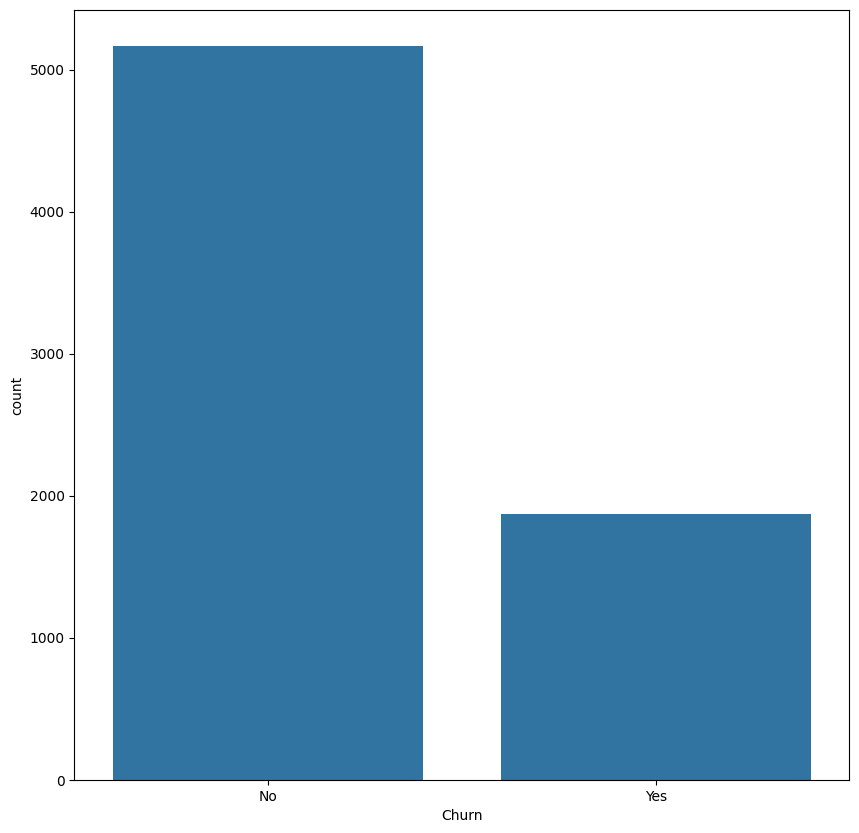

In [10]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x=df['Churn'])
plt.show()

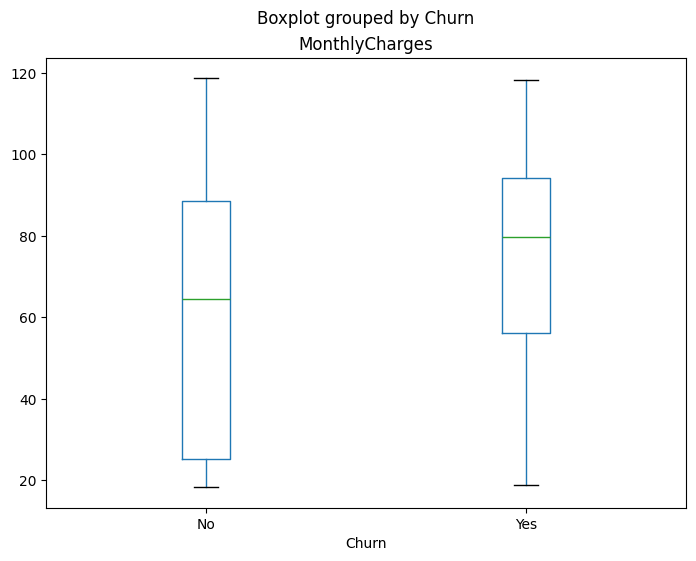

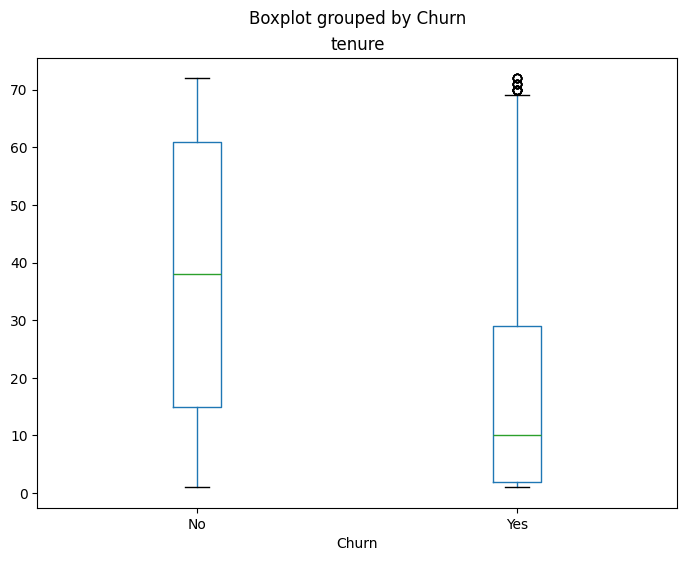

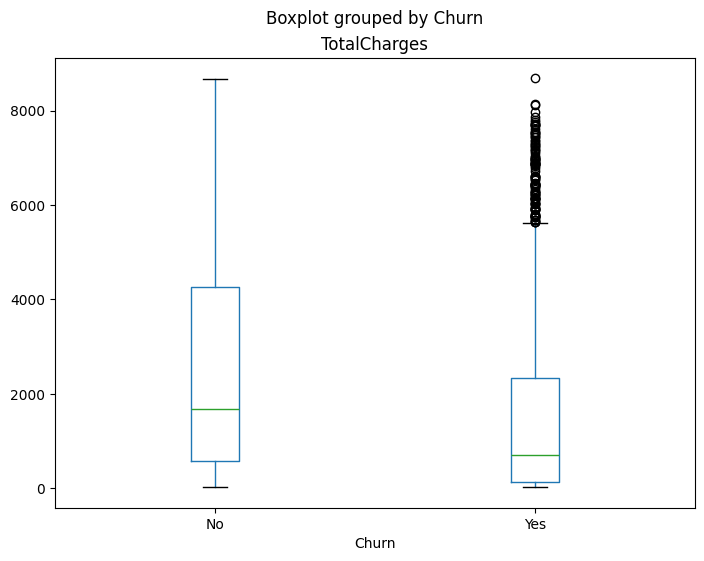

In [11]:
boxplot = df.boxplot(column=['MonthlyCharges'], grid=False, by='Churn', figsize=(8,6))
boxplot = df.boxplot(column=['tenure'], by='Churn', grid=False, figsize=(8,6))
boxplot = df.boxplot(column=['TotalCharges'], by='Churn', grid=False, figsize=(8,6))

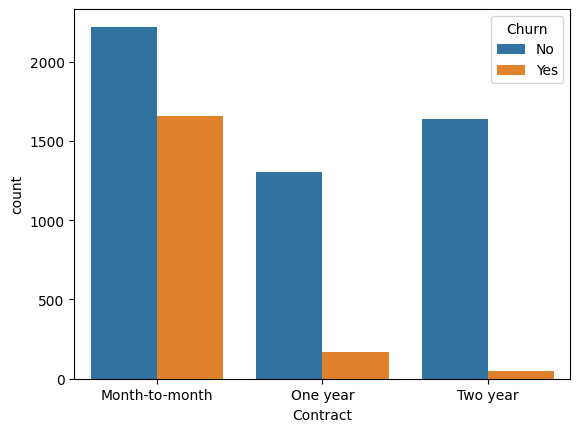

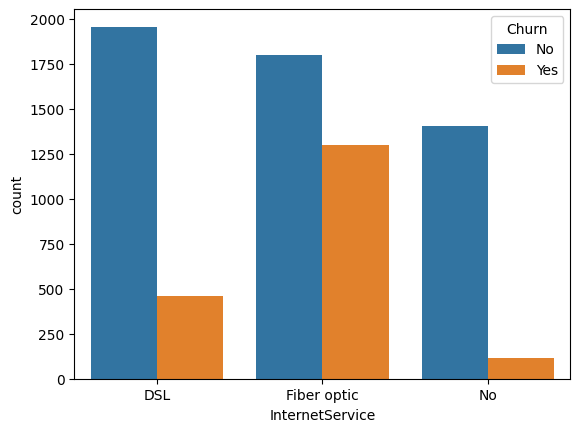

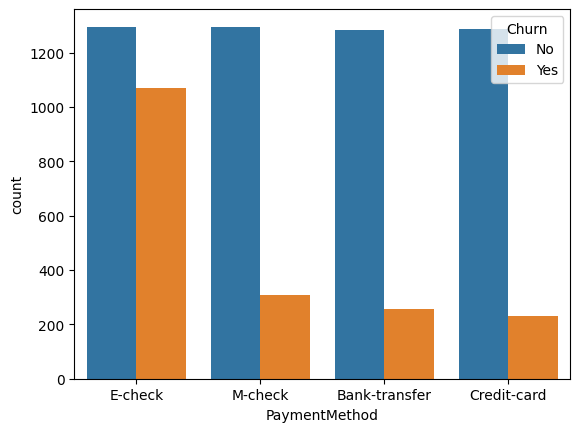

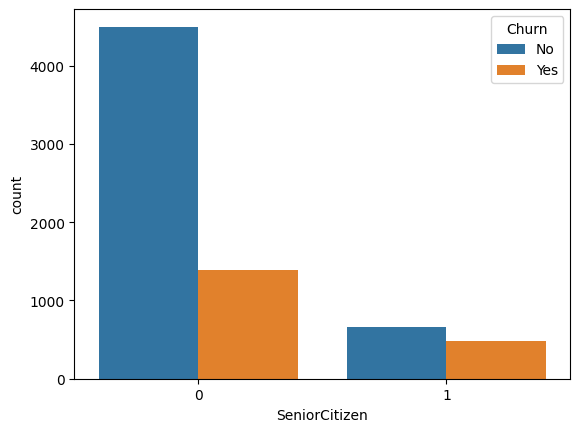

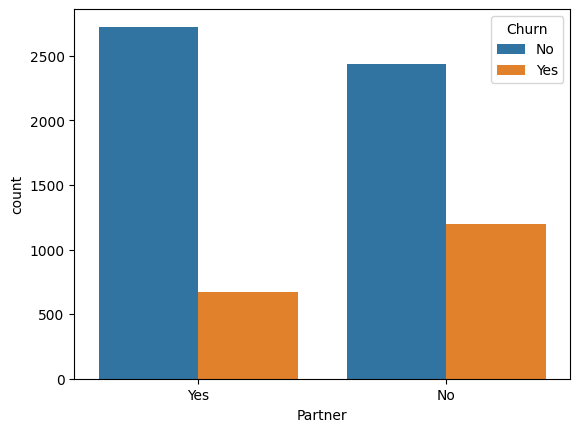

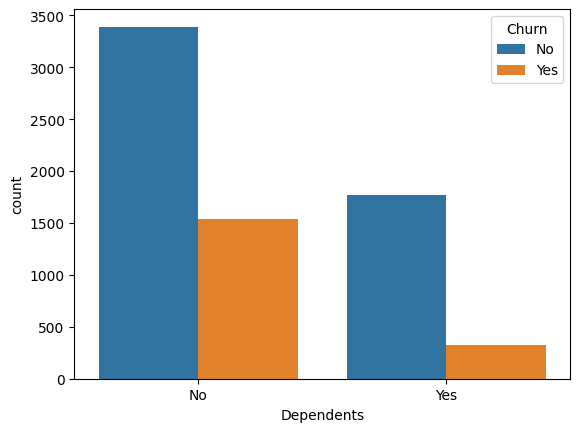

In [12]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.show()
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.show()
sns.countplot(x='Partner', hue='Churn', data=df)
plt.show()
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.show()

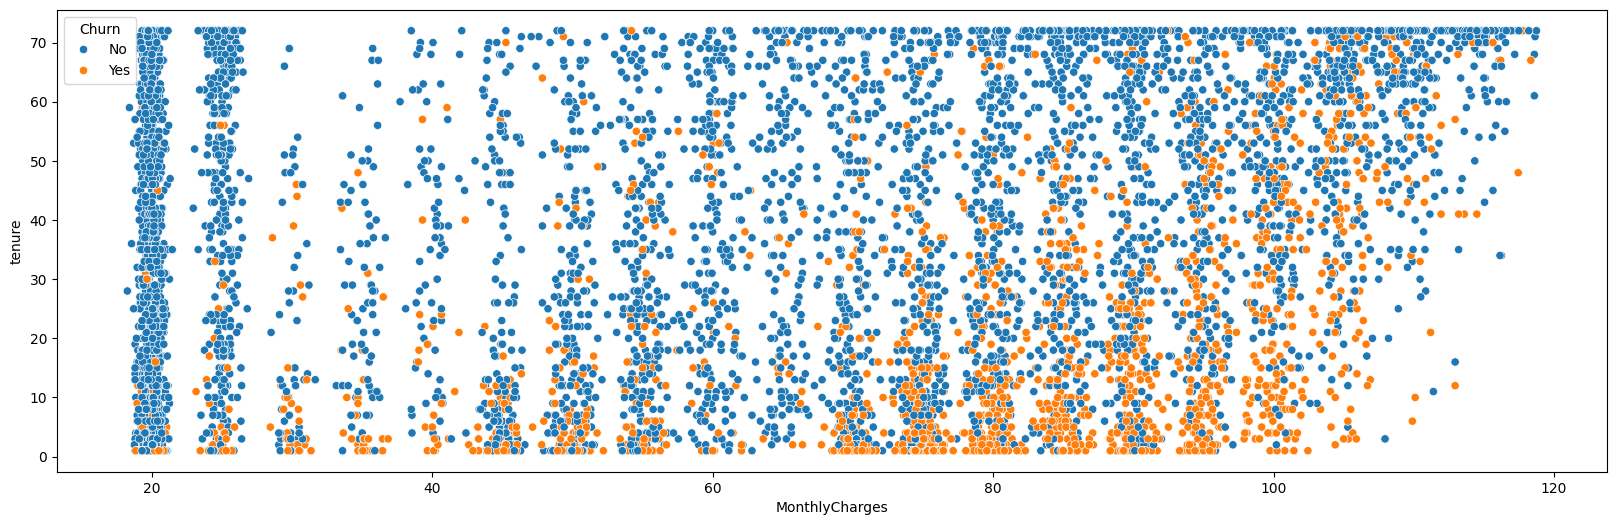

In [13]:
# scatterplot of MonthlyCharges vs tenure with hue as Churn
plt.figure(figsize=(20,6))
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df)
plt.show()

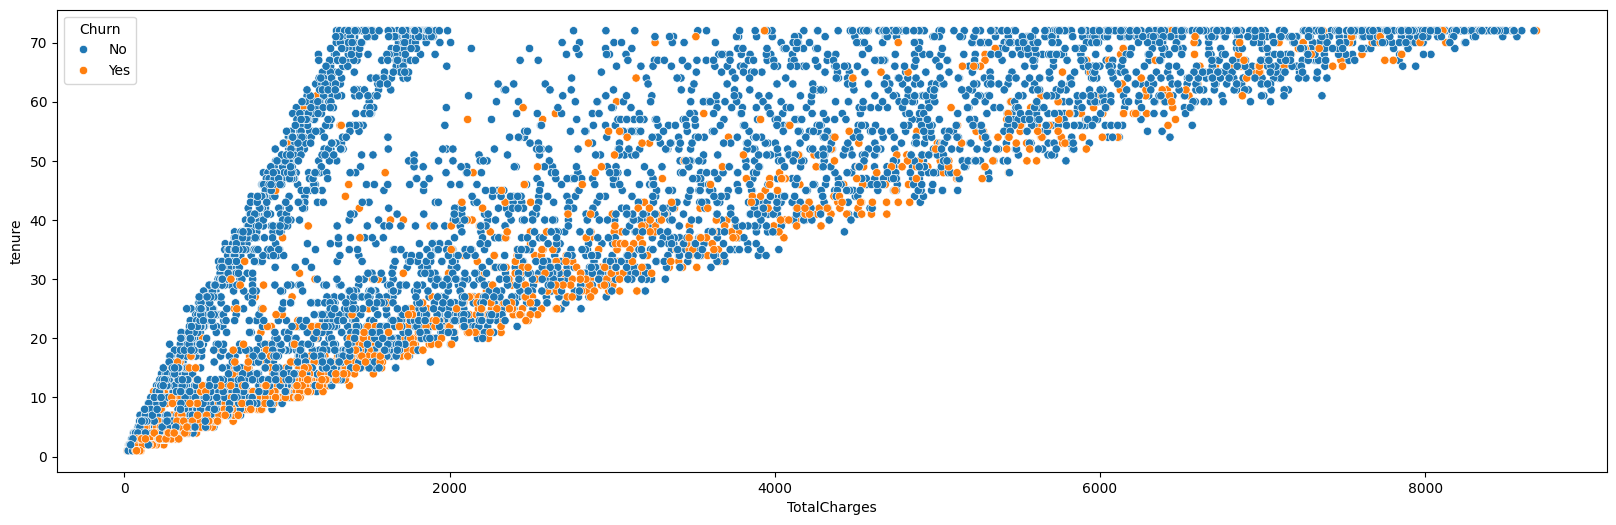

In [14]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='TotalCharges', y='tenure', hue='Churn', data=df)
plt.show()

C:\Users\Mircea\AppData\Local\Temp\ipykernel_26568\1192008745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_AdditionalServices'] = (df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',


<Axes: xlabel='Number_AdditionalServices', ylabel='count'>

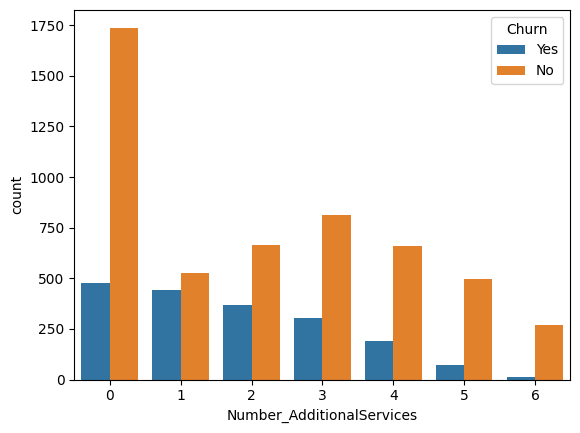

In [15]:
df['Number_AdditionalServices'] = (df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                      'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

sns.countplot(x='Number_AdditionalServices', hue='Churn', data=df)

In [16]:
features_le = ['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def label_encoder(features, df):
    for i in features:
        df[i] = df[i].map({'Yes':1, 'No':0})
    return

label_encoder(features_le, df)

df['gender'] = df['gender'].map({'Female':1, 'Male':0})
df =df.drop(columns=['customerID'])

C:\Users\Mircea\AppData\Local\Temp\ipykernel_26568\3312206012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].map({'Yes':1, 'No':0})
C:\Users\Mircea\AppData\Local\Temp\ipykernel_26568\3312206012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].map({'Yes':1, 'No':0})
C:\Users\Mircea\AppData\Local\Temp\ipykernel_26568\3312206012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [17]:
features_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaymentMethod', 'Number_AdditionalServices']

df = pd.get_dummies(data=df, columns=features_ohe)

In [18]:
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)

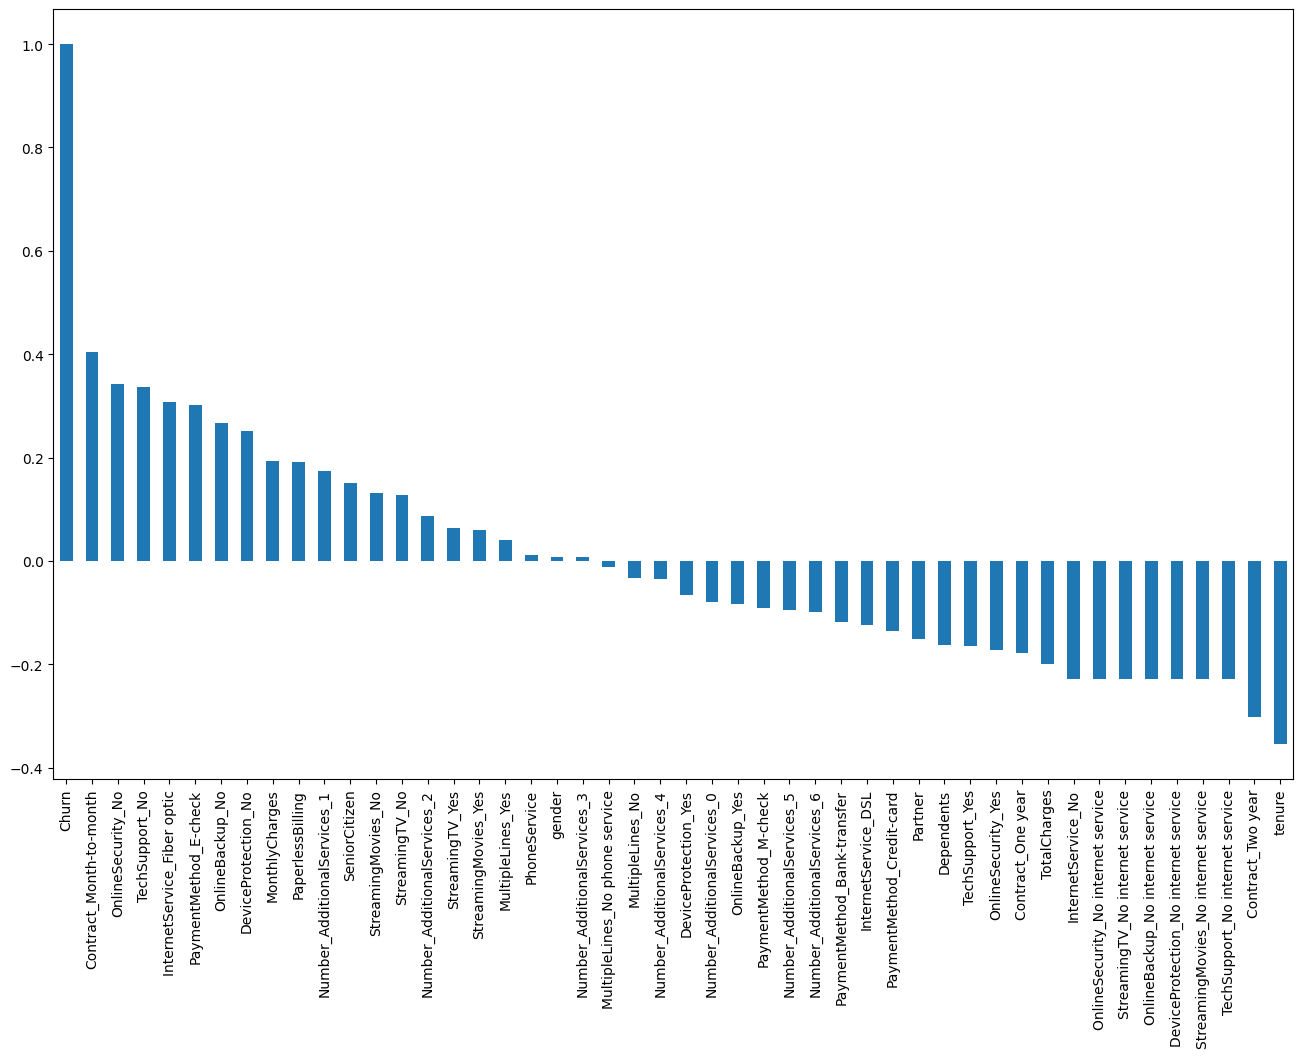

In [19]:
plt.figure(figsize=(16,10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [20]:
df.dtypes

gender                                    int64
SeniorCitizen                             int64
Partner                                   int64
Dependents                                int64
tenure                                  float64
PhoneService                              int64
PaperlessBilling                          int64
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                     int64
MultipleLines_No                          int64
MultipleLines_No phone service            int64
MultipleLines_Yes                         int64
InternetService_DSL                       int64
InternetService_Fiber optic               int64
InternetService_No                        int64
OnlineSecurity_No                         int64
OnlineSecurity_No internet service        int64
OnlineSecurity_Yes                        int64
OnlineBackup_No                           int64
OnlineBackup_No internet service        

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Numeric columns by dtype
num_cols = X.select_dtypes(include=["number"]).columns

# Preprocessor: scale numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols)
    ],
    remainder="passthrough"  # leave other columns as-is
)


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import auc, roc_curve, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

F1       : 0.602880658436214
F2       : 0.6996179560649475
Accuracy : 0.7256574271499645
Precision: 0.4899665551839465
Recall   : 0.7834224598930482
ROC AUC  : 0.8333794927810075


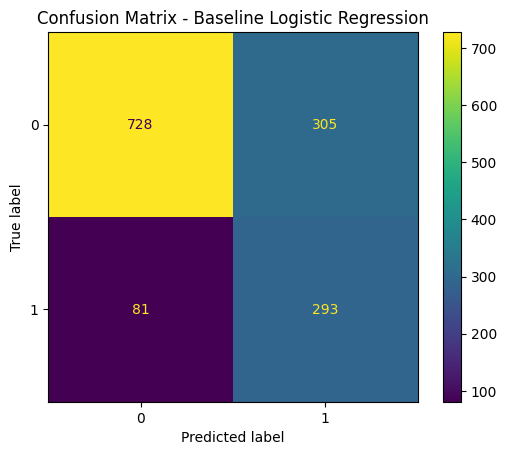

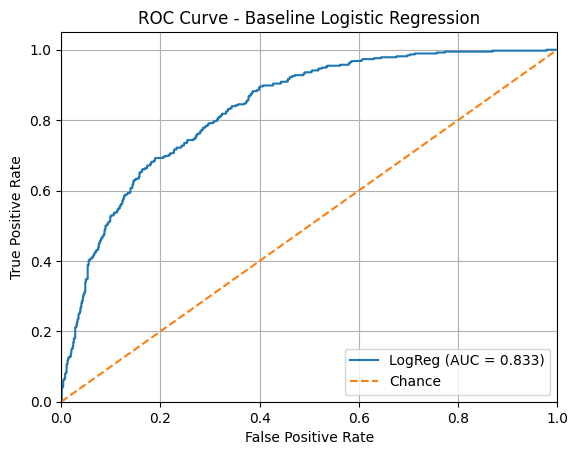

In [23]:
baseline_logreg = Pipeline([
    ("prep", preprocessor),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42,
    ))
])

baseline_logreg.fit(X_train, y_train)

# --- Predictions ---
y_pred = baseline_logreg.predict(X_test)
y_proba = baseline_logreg.predict_proba(X_test)[:, 1]

# Metrics
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_logreg.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix - Baseline Logistic Regression")
plt.show()

# ROC curve + AUC plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"LogReg (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Baseline Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

F1       : 0.602880658436214
F2       : 0.6996179560649475
Accuracy : 0.7256574271499645
Precision: 0.4899665551839465
Recall   : 0.7834224598930482
ROC AUC  : 0.8333794927810075


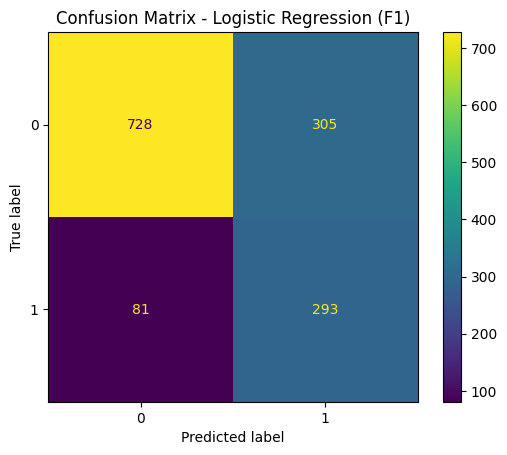

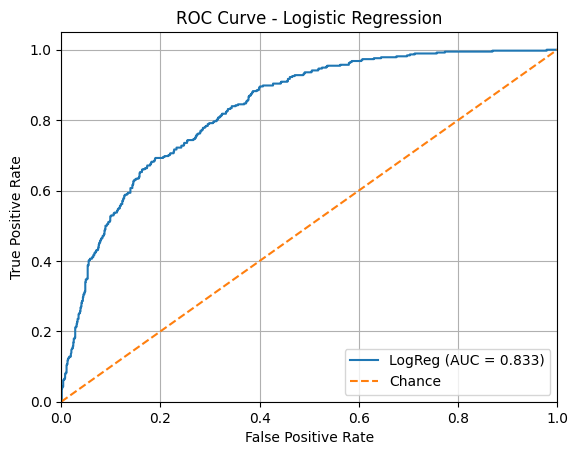

In [24]:
# LogReg F1

f1_logreg = Pipeline([
    ("model", LogisticRegression())
])

f1_logreg.set_params(
    model__C=0.31622776601683794,
    model__max_iter=2000,
    model__penalty="l1",
    model__solver="liblinear",
    model__tol=0.0001
)

# Fit
f1_logreg.fit(X_train, y_train)

# --- Predictions ---
y_pred = baseline_logreg.predict(X_test)
y_proba = baseline_logreg.predict_proba(X_test)[:, 1]

# Metrics
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=f1_logreg.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix - Logistic Regression (F1)")
plt.show()

# ROC curve + AUC plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"LogReg (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Best threshold for F2 on validation: 0.173 (F2=0.7154)
Threshold: 0.17333333333333334
F1       : 0.5473515248796148
F2       : 0.7200168918918919
Accuracy : 0.5991471215351812
Precision: 0.39105504587155965
Recall   : 0.9117647058823529
ROC AUC  : 0.805445693194113


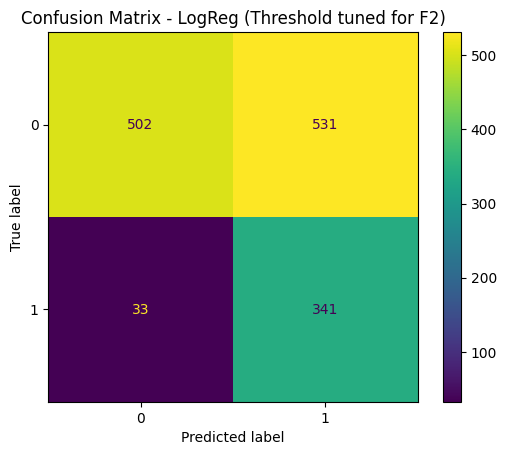

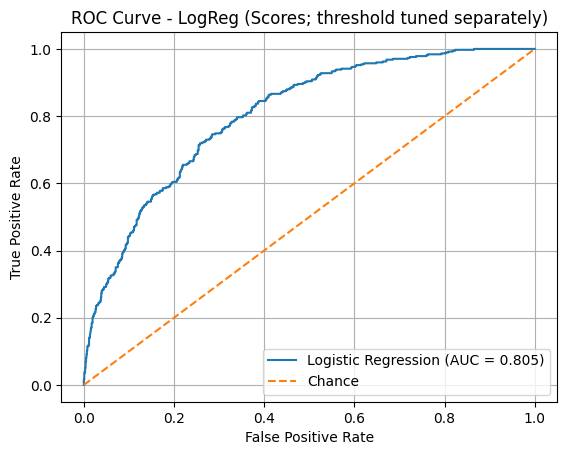

In [25]:
# --- LogReg (F2) threshold tuning on validation ---
# Assumes you already have:
# X_train, y_train, X_test, y_test
# metric functions available + train_test_split available (no imports shown)

# --- Split train into train/val for threshold tuning ---
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# --- Model ---
f2_logreg = Pipeline([
    ("model", LogisticRegression())
])

f2_logreg.set_params(
    model__C=0.0001,
    model__max_iter=2000,
    model__penalty="l2",
    model__solver="liblinear",
    model__tol=0.0001
)

# --- Fit on train split ---
f2_logreg.fit(X_tr, y_tr)

# --- Tune threshold on validation split to maximize F2 ---
val_proba = f2_logreg.predict_proba(X_val)[:, 1]

thresholds = np.linspace(0.01, 0.99, 199)
f2_vals = []

for t in thresholds:
    val_pred = (val_proba >= t).astype(int)
    f2_vals.append(fbeta_score(y_val, val_pred, beta=2, zero_division=0))

best_idx = int(np.argmax(f2_vals))
best_t = float(thresholds[best_idx])
best_f2_val = float(f2_vals[best_idx])

print(f"Best threshold for F2 on validation: {best_t:.3f} (F2={best_f2_val:.4f})")

# --- Refit on full training data (train+val) ---
f2_logreg.fit(X_train, y_train)

# --- Evaluate on test using tuned threshold ---
y_proba = f2_logreg.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= best_t).astype(int)

print("Threshold:", best_t)
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=f2_logreg.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix - LogReg (Threshold tuned for F2)")
plt.show()

# --- ROC Curve (threshold-free) ---
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LogReg (Scores; threshold tuned separately)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


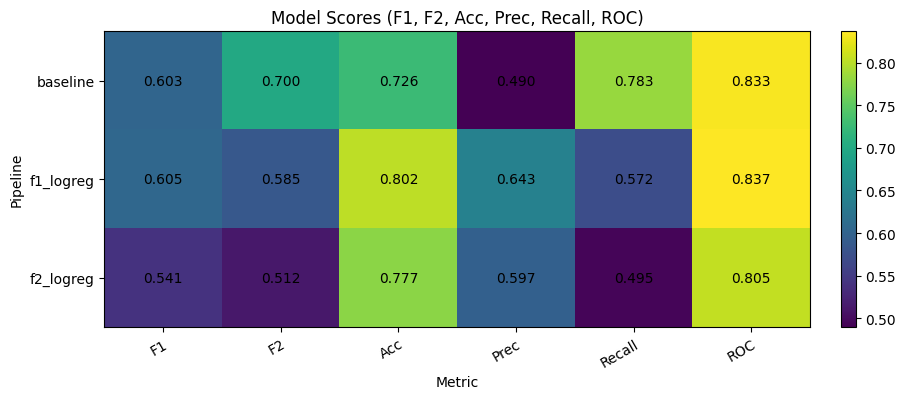

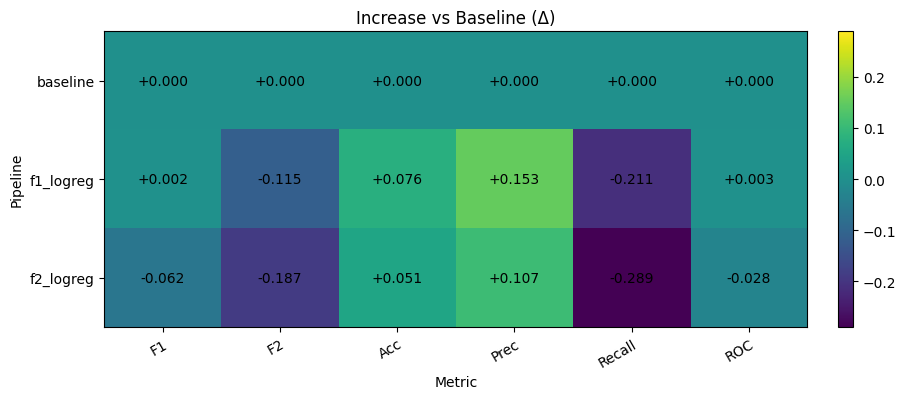

In [26]:
# Assumes you already have:
# - baseline_logreg, f1_logreg, f2_logreg  (sklearn Pipelines, already fit OR you will fit them before this)
# - X_test, y_test
# - metric fns available: f1_score, fbeta_score, accuracy_score, precision_score, recall_score, roc_auc_score
# - pandas as pd, numpy as np, matplotlib.pyplot as plt available (no imports shown)

pipelines = {
    "baseline": baseline_logreg,
    "f1_logreg": f1_logreg,
    "f2_logreg": f2_logreg,
}

metrics_order = ["F1", "F2", "Acc", "Prec", "Recall", "ROC"]

def _get_proba_or_score(model, X):
    # ROC AUC needs a continuous score; prefer proba if available
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        return model.decision_function(X)
    raise ValueError("Model has neither predict_proba nor decision_function; cannot compute ROC AUC.")

def eval_pipeline(name, pipe, X, y):
    y_pred = pipe.predict(X)
    y_score = _get_proba_or_score(pipe, X)

    return {
        "F1": f1_score(y, y_pred, zero_division=0),
        "F2": fbeta_score(y, y_pred, beta=2, zero_division=0),
        "Acc": accuracy_score(y, y_pred),
        "Prec": precision_score(y, y_pred, zero_division=0),
        "Recall": recall_score(y, y_pred, zero_division=0),
        "ROC": roc_auc_score(y, y_score),
    }

# --- Build score table ---
rows = {}
for name, pipe in pipelines.items():
    rows[name] = eval_pipeline(name, pipe, X_test, y_test)

scores_df = pd.DataFrame(rows).T[metrics_order]  # rows=pipelines, cols=metrics

# --- Increase vs baseline ---
baseline_row = scores_df.loc["baseline"]
delta_df = scores_df.subtract(baseline_row, axis=1)

# --- Heatmap helper (matplotlib, no seaborn) ---
def plot_heatmap(df, title, fmt="{:.3f}", center=None):
    data = df.to_numpy(dtype=float)

    fig, ax = plt.subplots(figsize=(1.2 * df.shape[1] + 2, 0.7 * df.shape[0] + 2))
    im = ax.imshow(data, aspect="auto", interpolation="nearest", vmin=None, vmax=None)

    # Optional diverging scale centered at 0 (nice for deltas)
    if center is not None:
        max_abs = np.nanmax(np.abs(data))
        im.set_clim(-max_abs, max_abs)

    ax.set_title(title)
    ax.set_xticks(np.arange(df.shape[1]))
    ax.set_yticks(np.arange(df.shape[0]))
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.index)

    # Rotate x labels for readability
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

    # Annotate cells
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            val = data[i, j]
            text = "NA" if (val is None or (isinstance(val, float) and np.isnan(val))) else fmt.format(val)
            ax.text(j, i, text, ha="center", va="center")

    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel("Metric")
    ax.set_ylabel("Pipeline")
    plt.tight_layout()
    plt.show()

# --- Plot 1: absolute scores ---
plot_heatmap(scores_df, "Model Scores (F1, F2, Acc, Prec, Recall, ROC)", fmt="{:.3f}")

# --- Plot 2: increase vs baseline ---
plot_heatmap(delta_df, "Increase vs Baseline (Δ)", fmt="{:+.3f}", center=0)


F1       : 0.5072655217965654
F2       : 0.5109100585417775
Accuracy : 0.7348969438521677
Precision: 0.5013054830287206
Recall   : 0.5133689839572193
ROC AUC  : 0.6639997722225386


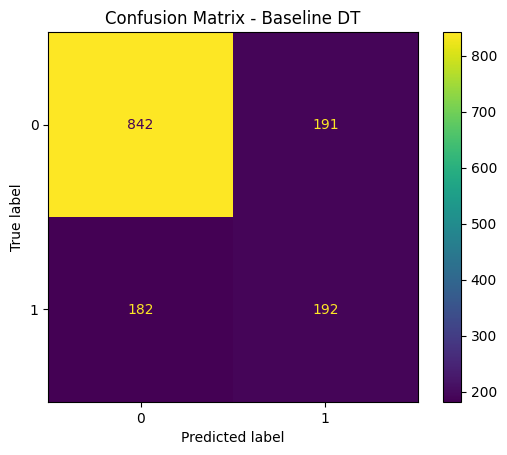

In [65]:
from sklearn.tree import DecisionTreeClassifier

baseline_dt = Pipeline([
    ("prep", preprocessor),
    ("model", DecisionTreeClassifier())
])

baseline_dt.fit(X_train, y_train)

#  Predictions
y_pred = baseline_dt.predict(X_test)
y_proba = baseline_dt.predict_proba(X_test)[:, 1]
# Metrics
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_dt.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix - Baseline DT")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Baseline DT")
plt.legend(loc="lower right")
plt.grid(True)

F1       : 0.5925176946410515
F2       : 0.693983893889152
Accuracy : 0.7135749822316987
Precision: 0.4764227642276423
Recall   : 0.7834224598930482
ROC AUC  : 0.8017028953621401


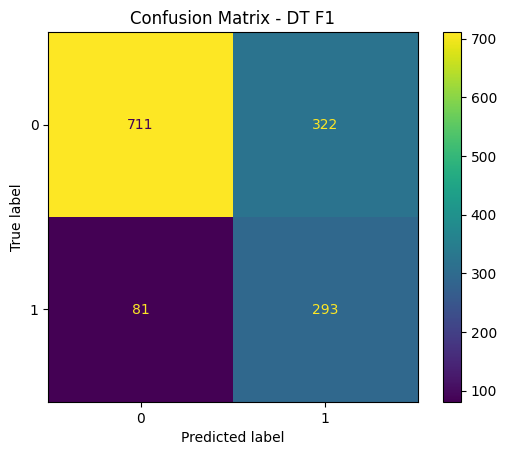

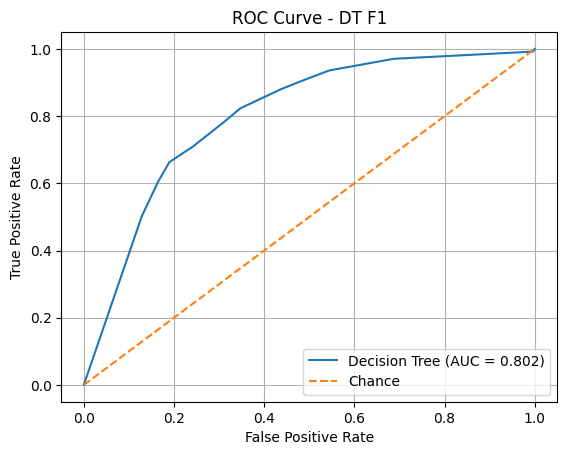

In [27]:
from sklearn.tree import DecisionTreeClassifier

f1_dt = Pipeline([
    ("prep", preprocessor),
    ("model", DecisionTreeClassifier(
        ccp_alpha=0.001,
        criterion="gini",
        max_depth=16,
        max_features="sqrt",
        min_samples_leaf=2,
        min_samples_split=10,
        splitter="best",
        class_weight="balanced",
        random_state=42
    ))
])

f1_dt.fit(X_train, y_train)

#  Predictions
y_pred = f1_dt.predict(X_test)
y_proba = f1_dt.predict_proba(X_test)[:, 1]
# Metrics
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=f1_dt.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix - DT F1")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - DT F1")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Best threshold for F2 on validation: 0.262 (F2=0.7124)
Threshold: 0.26242424242424245
F1       : 0.5034387895460798
F2       : 0.7104037267080745
Accuracy : 0.48685145700071075
Precision: 0.3388888888888889
Recall   : 0.9786096256684492
ROC AUC  : 0.7687929347572875


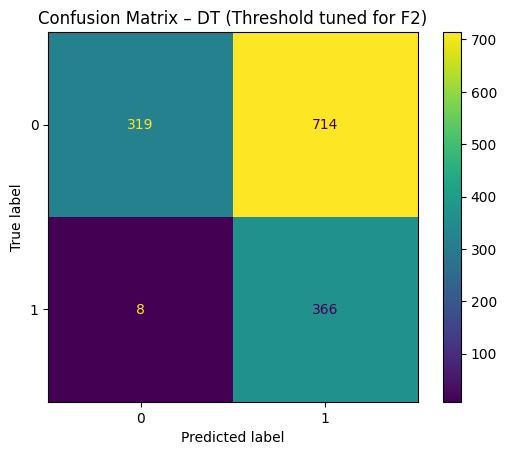

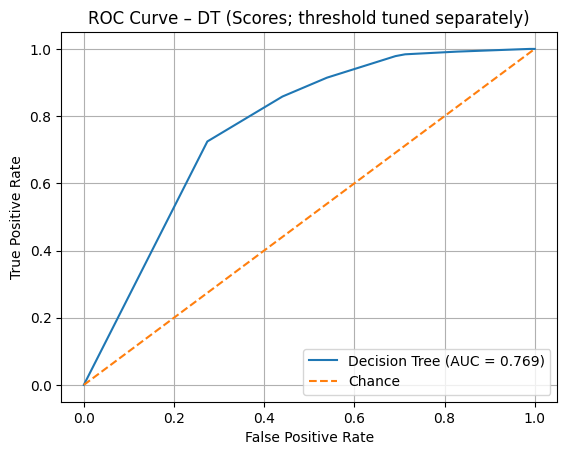

In [28]:
# --- DT (F2) threshold tuning on validation ---
# Assumes you already have:
# X_train, y_train, X_test, y_test
# preprocessor defined
# metric functions available + train_test_split available (no imports shown)

# --- Split train into train/val for threshold tuning ---
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# --- Model ---
f2_dt = Pipeline([
    ("prep", preprocessor),
    ("model", DecisionTreeClassifier(
        ccp_alpha=0.0,
        criterion="gini",
        max_depth=3,
        max_features="sqrt",
        min_samples_leaf=1,
        min_samples_split=2,
        splitter="random",
        class_weight="balanced",
        random_state=42
    ))
])

# --- Fit on train split ---
f2_dt.fit(X_tr, y_tr)

# --- Tune threshold on validation split to maximize F2 ---
val_proba = f2_dt.predict_proba(X_val)[:, 1]

thresholds = np.linspace(0.01, 0.99, 199)
f2_vals = []

for t in thresholds:
    val_pred = (val_proba >= t).astype(int)
    f2_vals.append(fbeta_score(y_val, val_pred, beta=2, zero_division=0))

best_idx = int(np.argmax(f2_vals))
best_t = float(thresholds[best_idx])
best_f2_val = float(f2_vals[best_idx])

print(f"Best threshold for F2 on validation: {best_t:.3f} (F2={best_f2_val:.4f})")

# --- Refit on full training data (train+val) ---
f2_dt.fit(X_train, y_train)

# --- Evaluate on test using tuned threshold ---
y_proba = f2_dt.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= best_t).astype(int)

print("Threshold:", best_t)
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=f2_dt.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix – DT (Threshold tuned for F2)")
plt.show()

# --- ROC Curve (threshold-free) ---
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – DT (Scores; threshold tuned separately)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


F1       : 0.5481481481481482
F2       : 0.5147468002225932
Accuracy : 0.783226723525231
Precision: 0.6146179401993356
Recall   : 0.4946524064171123
ROC AUC  : 0.8141051192984454


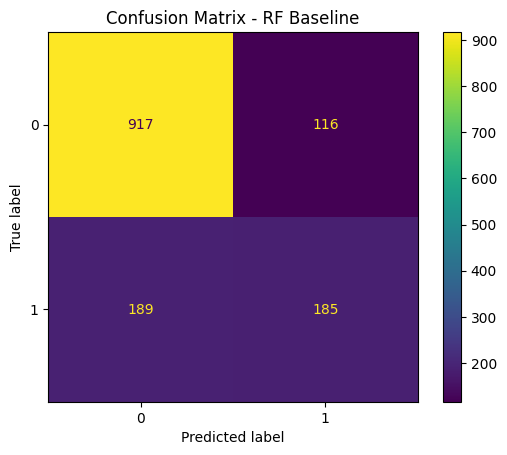

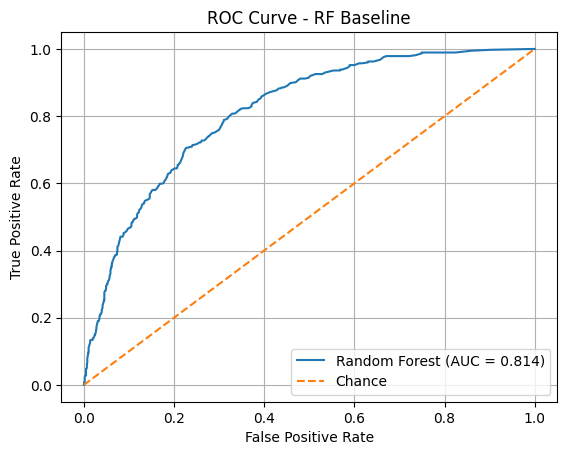

In [29]:
baseline_rf = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced",
    ))
])

baseline_rf.fit(X_train, y_train)

#  Predictions 
y_pred = baseline_rf.predict(X_test)
y_proba = baseline_rf.predict_proba(X_test)[:, 1]

# Metrics
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_rf.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix - RF Baseline")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RF Baseline")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

F1       : 0.6160427807486631
F2       : 0.7000486144871172
Accuracy : 0.7448471926083866
Precision: 0.5133689839572193
Recall   : 0.7700534759358288
ROC AUC  : 0.8337082170719207


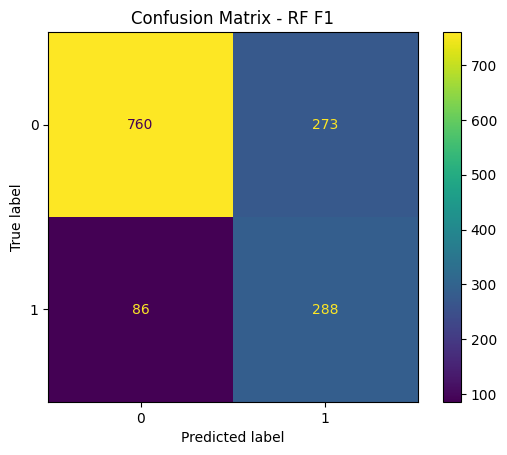

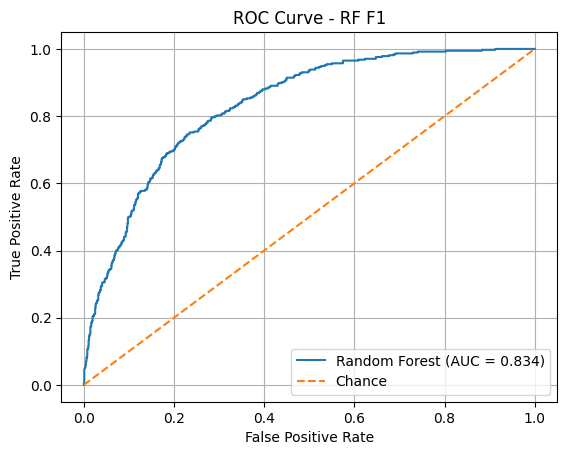

In [30]:
f1_rf = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=800,
        max_depth=8,
        max_features="log2",
        min_samples_leaf=1,
        min_samples_split=10,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])


f1_rf.fit(X_train, y_train)

#  Predictions 
y_pred = f1_rf.predict(X_test)
y_proba = f1_rf.predict_proba(X_test)[:, 1]

# Metrics
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=f1_rf.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix - RF F1")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RF F1")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Best threshold for F2 on validation: 0.386 (F2=0.7382)
Threshold: 0.38616161616161615
F1       : 0.5658119658119658
F2       : 0.7220767888307156
Accuracy : 0.6389481165600569
Precision: 0.4158291457286432
Recall   : 0.8850267379679144
ROC AUC  : 0.82466312231132


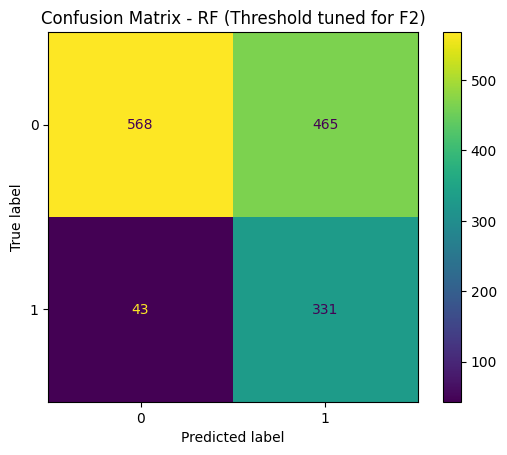

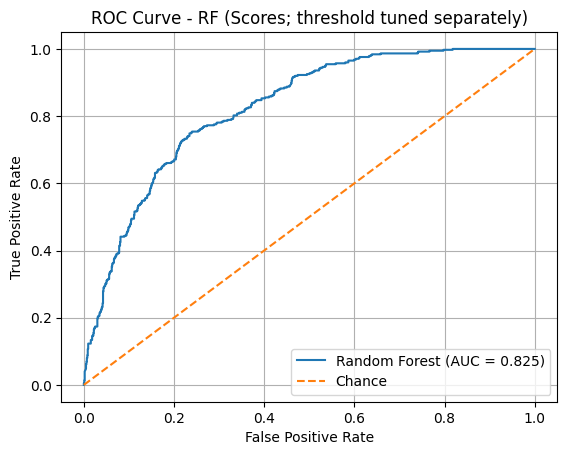

In [31]:
# Assumes you already have:
# X_train, y_train, X_test, y_test
# and metric functions available + train_test_split available (no imports shown)

# --- Split train into train/val for threshold tuning ---
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# --- Model ---
f2_rf = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=800,
        max_depth=3,
        max_features="log2",
        min_samples_leaf=1,
        min_samples_split=2,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

# --- Fit on train split ---
f2_rf.fit(X_tr, y_tr)

# --- Tune threshold on validation split to maximize F2 ---
val_proba = f2_rf.predict_proba(X_val)[:, 1]

thresholds = np.linspace(0.01, 0.99, 199)
f2_vals = []

for t in thresholds:
    val_pred = (val_proba >= t).astype(int)
    f2_vals.append(fbeta_score(y_val, val_pred, beta=2, zero_division=0))

best_idx = int(np.argmax(f2_vals))
best_t = float(thresholds[best_idx])
best_f2_val = float(f2_vals[best_idx])

print(f"Best threshold for F2 on validation: {best_t:.3f} (F2={best_f2_val:.4f})")

# --- Refit on full training data (train+val) ---
f2_rf.fit(X_train, y_train)

# --- Evaluate on test using tuned threshold ---
y_proba = f2_rf.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= best_t).astype(int)

print("Threshold:", best_t)
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=f2_rf.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix - RF (Threshold tuned for F2)")
plt.show()

# --- ROC Curve (unchanged; ROC AUC is threshold-free) ---
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RF (Scores; threshold tuned separately)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


F1       : 0.5803996194100857
F2       : 0.7017947537965946
Accuracy : 0.6865671641791045
Precision: 0.4505169867060561
Recall   : 0.8155080213903744
ROC AUC  : 0.8148104529147749


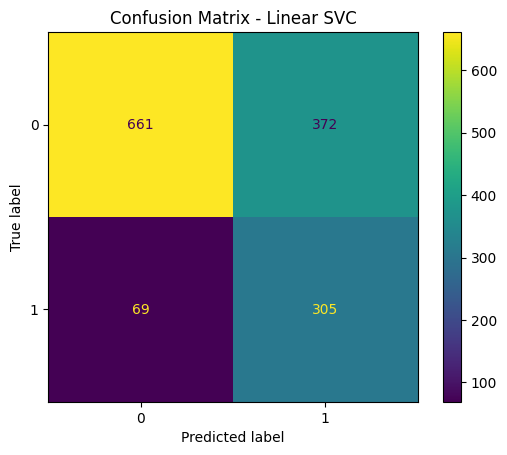

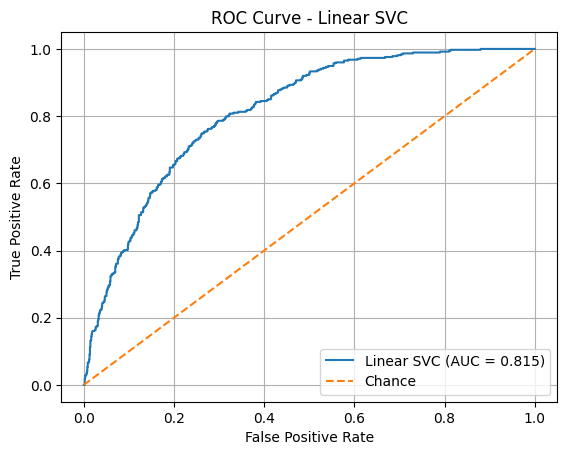

In [32]:
from sklearn.svm import SVC

baseline_svc = Pipeline([
    ("prep", preprocessor),
    ("model", SVC(
        kernel="linear",
        class_weight="balanced",
        probability=True,
        random_state=42
    ))
])

baseline_svc.fit(X_train, y_train)

#  Predictions 
y_pred = baseline_svc.predict(X_test)
y_proba = baseline_svc.predict_proba(X_test)[:, 1]

# Metrics
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_svc.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix - Linear SVC")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"Linear SVC (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Linear SVC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



F1       : 0.5881188118811881
F2       : 0.6965290806754222
Accuracy : 0.7043354655294953
Precision: 0.4669811320754717
Recall   : 0.7941176470588235
ROC AUC  : 0.8104205600219495


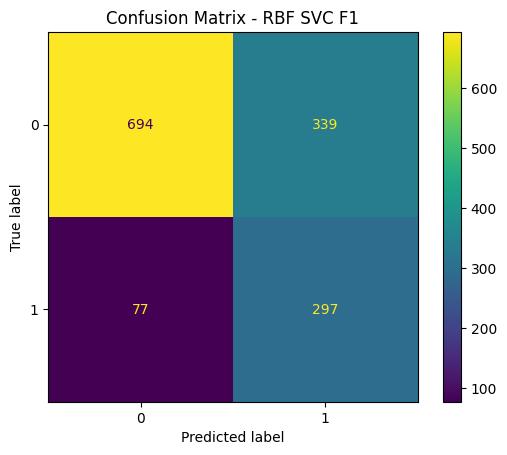

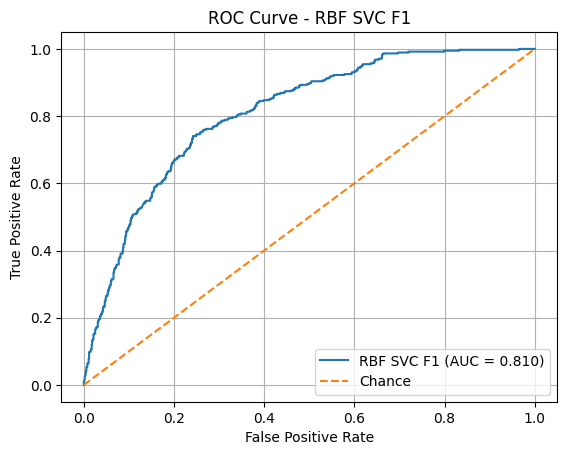

In [105]:
from sklearn.svm import SVC

# --- Model ---
f1_svc = Pipeline([
    ("prep", preprocessor),
    ("model", SVC(
        C=0.01,
        kernel="rbf",
        gamma=0.1,
        class_weight="balanced",
        probability=True,
        random_state=42
    ))
])

f1_svc.fit(X_train, y_train)

#  Predictions 
y_pred = f1_svc.predict(X_test)
y_proba = f1_svc.predict_proba(X_test)[:, 1]

# Metrics
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=f1_svc.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix - RBF SVC F1")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"RBF SVC F1 (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RBF SVC F1")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



Best threshold for F2 on validation: 0.079 (F2=0.7305)
Threshold: 0.07929292929292929
F1       : 0.5472868217054263
F2       : 0.7317578772802653
Accuracy : 0.5849324804548686
Precision: 0.3853711790393013
Recall   : 0.9438502673796791
ROC AUC  : 0.8205424209638092


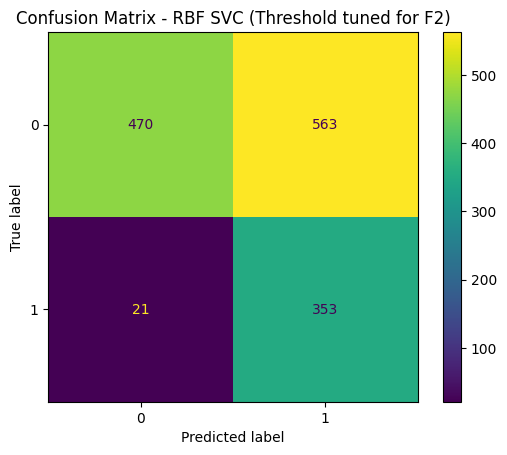

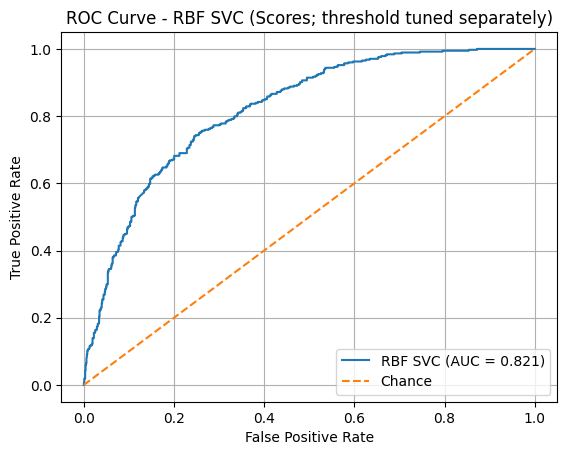

In [35]:
# --- RBF SVC (F2) threshold tuning on validation ---
# Assumes you already have:
# X_train, y_train, X_test, y_test
# preprocessor defined
# metric functions available + train_test_split available (no imports shown)

# --- Split train into train/val for threshold tuning ---
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# --- Model ---
f2_svc = Pipeline([
    ("prep", preprocessor),
    ("model", SVC(
        C=0.1,
        gamma=0.01,
        kernel="rbf",
        class_weight="balanced",
        probability=True,
        random_state=42
    ))
])

# --- Fit on train split ---
f2_svc.fit(X_tr, y_tr)

# --- Tune threshold on validation split to maximize F2 ---
val_proba = f2_svc.predict_proba(X_val)[:, 1]

thresholds = np.linspace(0.01, 0.99, 199)
f2_vals = []

for t in thresholds:
    val_pred = (val_proba >= t).astype(int)
    f2_vals.append(fbeta_score(y_val, val_pred, beta=2, zero_division=0))

best_idx = int(np.argmax(f2_vals))
best_t = float(thresholds[best_idx])
best_f2_val = float(f2_vals[best_idx])

print(f"Best threshold for F2 on validation: {best_t:.3f} (F2={best_f2_val:.4f})")

# --- Refit on full training data (train+val) ---
f2_svc.fit(X_train, y_train)

# --- Evaluate on test using tuned threshold ---
y_proba = f2_svc.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= best_t).astype(int)

print("Threshold:", best_t)
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=f2_svc.classes_)
disp.plot(values_format="d")
plt.title("Confusion Matrix - RBF SVC (Threshold tuned for F2)")
plt.show()

# --- ROC Curve (threshold-free) ---
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"RBF SVC (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RBF SVC (Scores; threshold tuned separately)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Baseline XGBoost
F1       : 0.5487465181058496
F2       : 0.5353260869565217
Accuracy : 0.7697228144989339
Precision: 0.5726744186046512
Recall   : 0.5267379679144385
ROC AUC  : 0.80778041217367


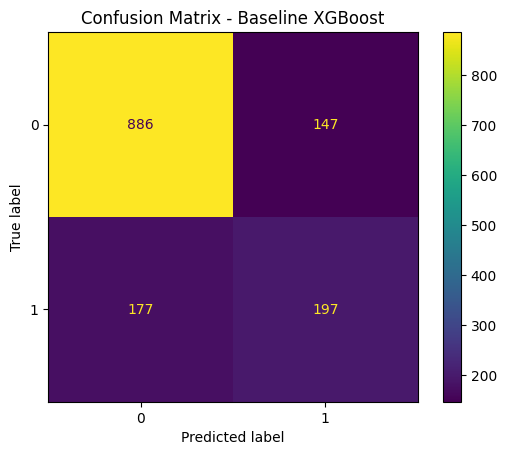

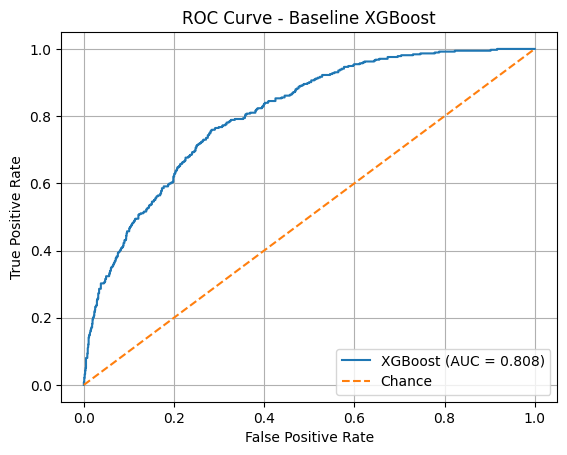

In [36]:
from xgboost import XGBClassifier

baseline_xgb = Pipeline([
    ("prep", preprocessor),
    ("model", XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    ))
])

# Fit
baseline_xgb.fit(X_train, y_train)

# Predictions
y_pred = baseline_xgb.predict(X_test)
y_proba = baseline_xgb.predict_proba(X_test)[:, 1]

# Metrics
print("Baseline XGBoost")
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=baseline_xgb.classes_).plot(values_format="d")
plt.title("Confusion Matrix - Baseline XGBoost")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Baseline XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Baseline XGBoost
F1       : 0.5764705882352941
F2       : 0.5438401775804661
Accuracy : 0.7953091684434968
Precision: 0.6405228758169934
Recall   : 0.5240641711229946
ROC AUC  : 0.8372542980053943


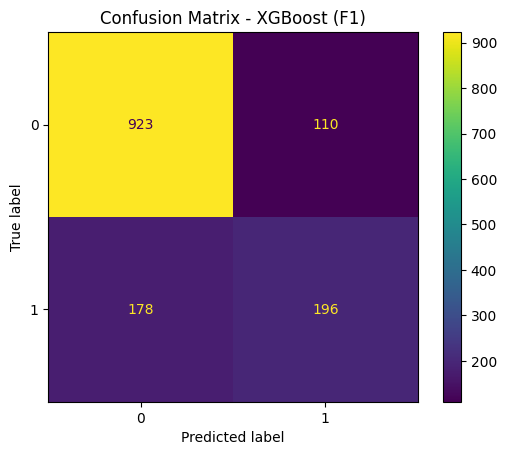

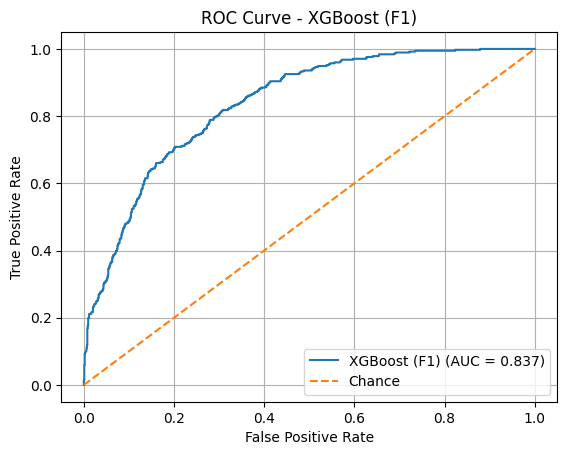

In [37]:
from xgboost import XGBClassifier


f1_xgb = Pipeline([
    ("prep", preprocessor),
    ("model", XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.7,
        colsample_bytree=0.85,
        min_child_weight=1,
        random_state=42,
        eval_metric="logloss"
    ))
])

f1_xgb.fit(X_train, y_train)

# Predictions
y_pred = f1_xgb.predict(X_test)
y_proba = f1_xgb.predict_proba(X_test)[:, 1]

# Metrics
print("Baseline XGBoost")
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=f1_xgb.classes_).plot(values_format="d")
plt.title("Confusion Matrix - XGBoost (F1)")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"XGBoost (F1) (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (F1)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Best threshold for F2 on validation: 0.084 (F2=0.7375)
XGBoost (F2) – Threshold tuned
Threshold: 0.08424242424242423
F1       : 0.5574803149606299
F2       : 0.7399665551839465
Accuracy : 0.6005685856432125
Precision: 0.3950892857142857
Recall   : 0.946524064171123
ROC AUC  : 0.8318601135781251


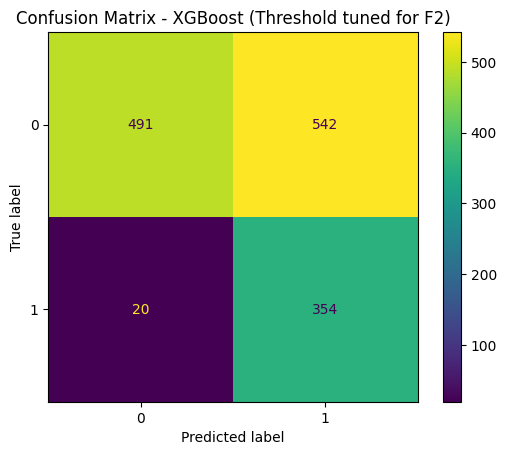

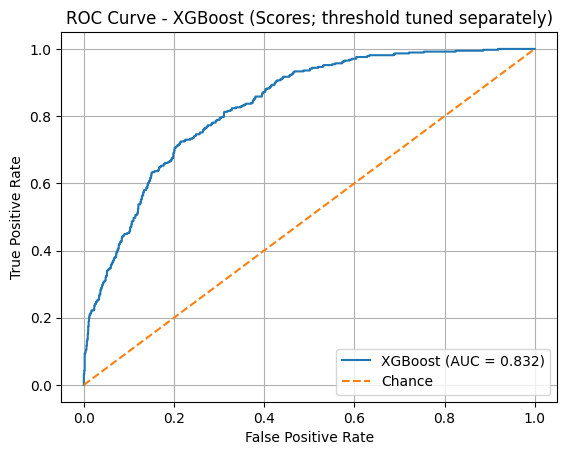

In [38]:
# --- XGBoost (F2) threshold tuning on validation ---
# Assumes you already have:
# X_train, y_train, X_test, y_test
# preprocessor defined
# metric functions available + train_test_split available (no imports shown)

# --- Split train into train/val for threshold tuning ---
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

from xgboost import XGBClassifier

f2_xgb = Pipeline([
    ("prep", preprocessor),
    ("model", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        eval_metric="logloss"
    ))
])

# --- Fit on train split ---
f2_xgb.fit(X_tr, y_tr)

# --- Tune threshold on validation split to maximize F2 ---
val_proba = f2_xgb.predict_proba(X_val)[:, 1]

thresholds = np.linspace(0.01, 0.99, 199)
f2_vals = []

for t in thresholds:
    val_pred = (val_proba >= t).astype(int)
    f2_vals.append(fbeta_score(y_val, val_pred, beta=2, zero_division=0))

best_idx = int(np.argmax(f2_vals))
best_t = float(thresholds[best_idx])
best_f2_val = float(f2_vals[best_idx])

print(f"Best threshold for F2 on validation: {best_t:.3f} (F2={best_f2_val:.4f})")

# --- Refit on full training data (train+val) ---
f2_xgb.fit(X_train, y_train)

# --- Evaluate on test using tuned threshold ---
y_proba = f2_xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= best_t).astype(int)

print("XGBoost (F2) – Threshold tuned")
print("Threshold:", best_t)
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("F2       :", fbeta_score(y_test, y_pred, beta=2, zero_division=0))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=f2_xgb.classes_).plot(values_format="d")
plt.title("Confusion Matrix - XGBoost (Threshold tuned for F2)")
plt.show()

# --- ROC Curve (threshold-free) ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (Scores; threshold tuned separately)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [66]:
import joblib

# export pkls to folder
path = "/pkls_for_shap_app"

joblib.dump(baseline_logreg, "baseline_logreg.pkl")
joblib.dump(f1_logreg, "f1_logreg.pkl")
joblib.dump(f2_logreg, "f2_logreg.pkl")
joblib.dump(baseline_dt, "baseline_dt.pkl")
joblib.dump(f1_dt, "f1_dt.pkl")
joblib.dump(f2_dt, "f2_dt.pkl")
joblib.dump(baseline_rf, "baseline_rf.pkl")
joblib.dump(f1_rf, "f1_rf.pkl")
joblib.dump(f2_rf, "f2_rf.pkl")
joblib.dump(baseline_svc, "baseline_svc.pkl")
joblib.dump(f1_svc, "f1_svc.pkl")
joblib.dump(f2_svc, "f2_svc.pkl")
joblib.dump(baseline_xgb, "baseline_xgb.pkl")
joblib.dump(f1_xgb, "f1_xgb.pkl")
joblib.dump(f2_xgb, "f2_xgb.pkl")

['f2_xgb.pkl']

In [67]:
import numpy as np
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------------
# Config
# -----------------------------
X_PATH = "X_test.npy"
MODEL_SAVE_DIR = Path("shap")          # save PKLs here
OUT_DIR = Path("shap_outputs")         # save SHAP outputs here

model_variants = ["baseline", "f1", "f2"]
model_types = ["logreg", "dt", "rf", "svc", "xgb"]

MODEL_SAVE_DIR.mkdir(exist_ok=True)
OUT_DIR.mkdir(exist_ok=True)

# -----------------------------
# Load data once
# -----------------------------
X_np = np.load(X_PATH, allow_pickle=True)

# -----------------------------
# Helpers
# -----------------------------
def get_model_from_memory(variant: str, algo: str):
    """
    Supports either:
      1) dicts: baseline_model["logreg"], f1_model["rf"], ...
      2) individual vars: baseline_logreg, f1_rf, ...
    """
    # Case 1: dicts named baseline_model, f1_model, f2_model
    dict_name = f"{variant}_model"
    if dict_name in globals() and isinstance(globals()[dict_name], dict):
        d = globals()[dict_name]
        if algo in d:
            return d[algo]

    # Case 2: individual variables named baseline_logreg, f1_rf, ...
    var_name = f"{variant}_{algo}"
    if var_name in globals():
        return globals()[var_name]

    return None

def make_X_for_model(model, X_np):
    """Ensure DataFrame if the model/pipeline expects named columns."""
    if hasattr(model, "feature_names_in_"):
        cols = list(model.feature_names_in_)
        if X_np.shape[1] != len(cols):
            raise ValueError(
                f"Feature mismatch: X has {X_np.shape[1]} cols but model expects {len(cols)}."
            )
        return pd.DataFrame(X_np, columns=cols)
    return X_np

def predict_score(model, X_in):
    """Return a 1D score for SHAP to explain (prefers positive-class proba)."""
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_in)
        if proba.ndim == 2 and proba.shape[1] >= 2:
            return proba[:, 1]
        return proba.ravel()
    if hasattr(model, "decision_function"):
        out = model.decision_function(X_in)
        return np.array(out).ravel()
    return np.array(model.predict(X_in)).ravel()

def save_current_fig(path: Path):
    plt.tight_layout()
    plt.savefig(path, dpi=200, bbox_inches="tight")
    plt.close()  # critical: prevents overlays/compound graphs

# -----------------------------
# Main loop
# -----------------------------
for variant in model_variants:
    for algo in model_types:
        model_name = f"{variant}_{algo}"
        model = get_model_from_memory(variant, algo)

        if model is None:
            print(f"❌ Missing model in memory: {model_name}")
            continue

        print(f"\n🚀 Running SHAP for {model_name}")

        # 1) Save model to PKL in shap/ folder
        pkl_path = MODEL_SAVE_DIR / f"{model_name}.pkl"
        joblib.dump(model, pkl_path)

        # 2) Prepare X
        X = make_X_for_model(model, X_np)

        # 3) Background + explain subset
        if hasattr(X, "sample"):
            background = X.sample(min(200, len(X)), random_state=0)
            X_explain = X.iloc[:200]
        else:
            background = X[:200]
            X_explain = X[:200]

        # 4) Explainer
        masker = shap.maskers.Independent(background)
        explainer = shap.Explainer(lambda Xin: predict_score(model, Xin), masker)
        shap_values = explainer(X_explain)

        # 5) Save outputs
        model_out = OUT_DIR / model_name
        model_out.mkdir(exist_ok=True)

        np.save(model_out / "shap_values.npy", shap_values.values)
        np.save(model_out / "base_values.npy", shap_values.base_values)

        # 6) Individual plots per model (no overlays)
        shap.plots.beeswarm(shap_values, show=False)
        save_current_fig(model_out / "beeswarm.png")

        shap.plots.bar(shap_values, show=False)
        save_current_fig(model_out / "bar.png")

        shap.plots.waterfall(shap_values[0], show=False)
        save_current_fig(model_out / "waterfall_row0.png")

        print(f"✅ Saved model: {pkl_path}")
        print(f"✅ Saved SHAP outputs: {model_out}")



🚀 Running SHAP for baseline_logreg


PermutationExplainer explainer: 201it [00:13,  4.04it/s]                         


✅ Saved model: shap\baseline_logreg.pkl
✅ Saved SHAP outputs: shap_outputs\baseline_logreg

🚀 Running SHAP for baseline_dt


PermutationExplainer explainer: 201it [00:13,  3.89it/s]                         


✅ Saved model: shap\baseline_dt.pkl
✅ Saved SHAP outputs: shap_outputs\baseline_dt

🚀 Running SHAP for baseline_rf


PermutationExplainer explainer: 201it [03:49,  1.20s/it]                         


✅ Saved model: shap\baseline_rf.pkl
✅ Saved SHAP outputs: shap_outputs\baseline_rf

🚀 Running SHAP for baseline_svc


PermutationExplainer explainer: 201it [14:18,  4.34s/it]                         


✅ Saved model: shap\baseline_svc.pkl
✅ Saved SHAP outputs: shap_outputs\baseline_svc

🚀 Running SHAP for baseline_xgb


PermutationExplainer explainer: 201it [00:28,  4.64it/s]                         


✅ Saved model: shap\baseline_xgb.pkl
✅ Saved SHAP outputs: shap_outputs\baseline_xgb

🚀 Running SHAP for f1_logreg
✅ Saved model: shap\f1_logreg.pkl
✅ Saved SHAP outputs: shap_outputs\f1_logreg

🚀 Running SHAP for f1_dt


PermutationExplainer explainer: 201it [00:14,  4.31it/s]                         


✅ Saved model: shap\f1_dt.pkl
✅ Saved SHAP outputs: shap_outputs\f1_dt

🚀 Running SHAP for f1_rf


PermutationExplainer explainer: 201it [06:27,  1.99s/it]                         


✅ Saved model: shap\f1_rf.pkl
✅ Saved SHAP outputs: shap_outputs\f1_rf

🚀 Running SHAP for f1_svc


PermutationExplainer explainer: 201it [1:05:24, 19.62s/it]                         


✅ Saved model: shap\f1_svc.pkl
✅ Saved SHAP outputs: shap_outputs\f1_svc

🚀 Running SHAP for f1_xgb


PermutationExplainer explainer: 201it [00:27,  4.59it/s]                         


✅ Saved model: shap\f1_xgb.pkl
✅ Saved SHAP outputs: shap_outputs\f1_xgb

🚀 Running SHAP for f2_logreg
✅ Saved model: shap\f2_logreg.pkl
✅ Saved SHAP outputs: shap_outputs\f2_logreg

🚀 Running SHAP for f2_dt


PermutationExplainer explainer: 201it [00:12,  3.06it/s]                         


✅ Saved model: shap\f2_dt.pkl
✅ Saved SHAP outputs: shap_outputs\f2_dt

🚀 Running SHAP for f2_rf


PermutationExplainer explainer: 201it [06:17,  1.94s/it]                         


✅ Saved model: shap\f2_rf.pkl
✅ Saved SHAP outputs: shap_outputs\f2_rf

🚀 Running SHAP for f2_svc


PermutationExplainer explainer: 201it [54:53, 16.47s/it]                         


✅ Saved model: shap\f2_svc.pkl
✅ Saved SHAP outputs: shap_outputs\f2_svc

🚀 Running SHAP for f2_xgb


PermutationExplainer explainer: 201it [00:30,  4.34it/s]                         


✅ Saved model: shap\f2_xgb.pkl
✅ Saved SHAP outputs: shap_outputs\f2_xgb


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def logreg_local_contrib(pipe, X_explain):
    model = pipe.named_steps["model"]

    # Transform if pipeline has preprocessing
    if "prep" in pipe.named_steps:
        prep = pipe.named_steps["prep"]
        Xex = prep.transform(X_explain)
        try:
            feature_names = prep.get_feature_names_out()
        except Exception:
            feature_names = [f"feature_{i}" for i in range(Xex.shape[1])]
    else:
        Xex = X_explain.values if hasattr(X_explain, "values") else np.asarray(X_explain)
        feature_names = list(X_explain.columns)

    Xex = Xex.toarray() if hasattr(Xex, "toarray") else np.asarray(Xex)

    coef = model.coef_.ravel()
    intercept = float(model.intercept_[0])

    contrib = Xex * coef  # log-odds contributions
    contrib_df = pd.DataFrame(contrib, columns=feature_names)

    contrib_df.insert(0, "intercept", intercept)
    contrib_df.insert(1, "pred_proba", pipe.predict_proba(X_explain)[:, 1])

    return contrib_df


In [100]:
log_contrib = logreg_local_contrib(f2_logreg, X_test.iloc[:50])


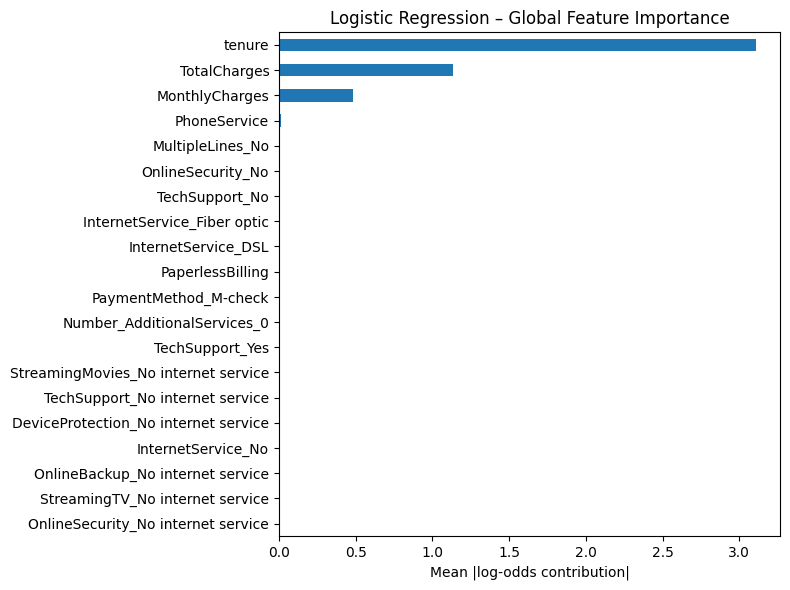

In [103]:
global_importance = (
    log_contrib
    .drop(columns=["intercept", "pred_proba"])
    .abs()
    .mean()
    .sort_values(ascending=True)
)

plt.figure(figsize=(8, 6))
global_importance.tail(20).plot(kind="barh")
plt.title("Logistic Regression – Global Feature Importance")
plt.xlabel("Mean |log-odds contribution|")
plt.tight_layout()
plt.show()
